In [192]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

In [193]:
realwage = pd.read_csv("prova.csv")
realwage = realwage.pivot_table(values='Value',
                                index='Time',
                                columns=['Game', 'Player', 'Statistics'])
realwage.tail(60)

Game            Game0                               
Player              b                     w         
Statistics Evaluation    HR TimeUsed     HR TimeUsed
Time                                                
804             -7.75  86.0    356.0  108.0    444.0
805             -7.75  87.0    356.0  104.0    444.0
806             -7.75  87.0    356.0  101.0    444.0
807             -7.75  88.0    356.0   97.0    444.0
808             -7.75  88.0    356.0   93.0    444.0
809            -20.00  87.0    363.0   89.0    444.0
810            -20.00  87.0    363.0   86.0    444.0
811            -20.00  86.0    363.0   82.0    444.0
812               NaN  87.0      NaN   83.0      NaN
813               NaN  87.0      NaN   83.0      NaN
814               NaN  88.0      NaN   84.0      NaN
815               NaN  88.0      NaN   84.0      NaN
816               NaN  88.0      NaN   85.0      NaN
817               NaN  88.0      NaN   84.0      NaN
818               NaN  87.0      NaN   83.0      NaN
819               NaN  87.0      NaN   82.0      NaN
820               NaN  88.0      NaN   83.0      NaN
821               NaN  89.0      NaN   84.0      NaN
822               NaN  89.0      NaN   84.0      NaN
823               NaN  89.0      NaN   85.0      NaN
824               NaN  89.0      NaN   86.0      NaN
825               NaN  90.0      NaN   87.0      NaN
826               NaN  90.0      NaN   88.0      NaN
827               NaN  90.0      NaN   88.0      NaN
828               NaN  91.0      NaN   89.0      NaN
829               NaN  90.0      NaN   89.0      NaN
830               NaN  90.0      NaN   88.0      NaN
831               NaN  90.0      NaN   88.0      NaN
832               NaN  89.0      NaN   88.0      NaN
833               NaN  88.0      NaN   88.0      NaN
834               NaN  88.0      NaN   87.0      NaN
835               NaN  87.0      NaN   87.0      NaN
836               NaN  87.0      NaN   87.0      NaN
837               NaN  86.0      NaN   86.0      NaN
838               NaN  87.0      NaN   86.0      NaN
839               NaN  87.0      NaN   92.0      NaN
840               NaN  89.0      NaN   96.0      NaN
841               NaN  90.0      NaN   98.0      NaN
842               NaN  92.0      NaN   99.0      NaN
843               NaN  94.0      NaN  103.0      NaN
844               NaN  96.0      NaN  104.0      NaN
845               NaN  97.0      NaN  106.0      NaN
846               NaN  97.0      NaN  108.0      NaN
847               NaN  97.0      NaN  110.0      NaN
848               NaN  97.0      NaN  112.0      NaN
849               NaN  95.0      NaN  113.0      NaN
850               NaN  93.0      NaN  114.0      NaN
851               NaN  92.0      NaN  116.0      NaN
852               NaN  90.0      NaN  117.0      NaN
853               NaN  90.0      NaN  118.0      NaN
854               NaN  89.0      NaN  119.0      NaN
855               NaN  89.0      NaN  119.0      NaN
856               NaN  90.0      NaN  120.0      NaN
857               NaN  91.0      NaN  120.0      NaN
858               NaN  92.0      NaN  120.0      NaN
859               NaN  92.0      NaN  121.0      NaN
860               NaN  92.0      NaN  121.0      NaN
861               NaN  90.0      NaN  121.0      NaN
862               NaN  88.0      NaN  122.0      NaN
863               NaN   NaN      NaN  122.0      NaN

## Analisi bivariata con due variabili quantitative

<AxesSubplot:xlabel='HR', ylabel='Evaluation'>

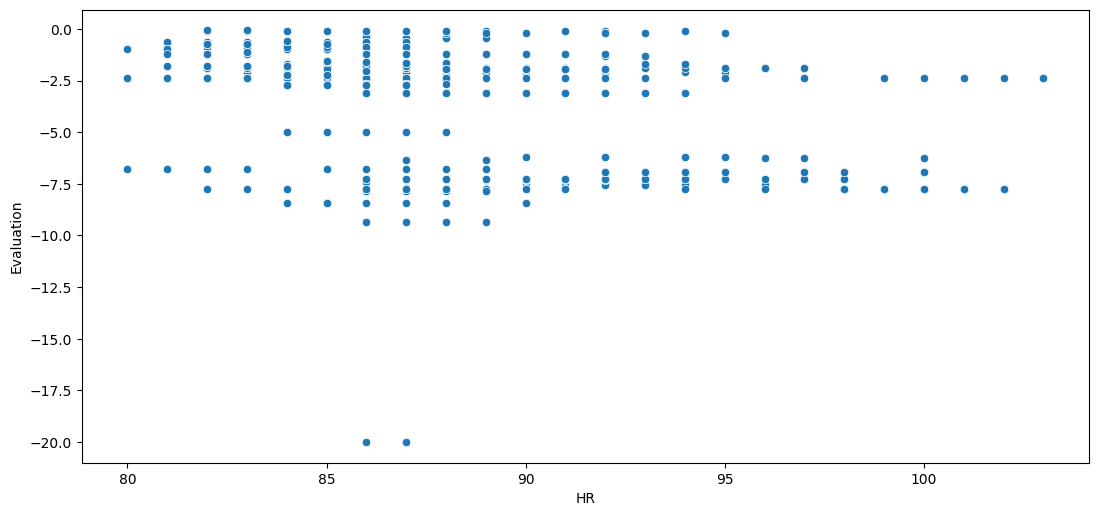

In [194]:
#diagramma a dispersione
sns.scatterplot(x=realwage['Game0']['b']['HR'], y=realwage['Game0']['b']['Evaluation'], data=realwage)


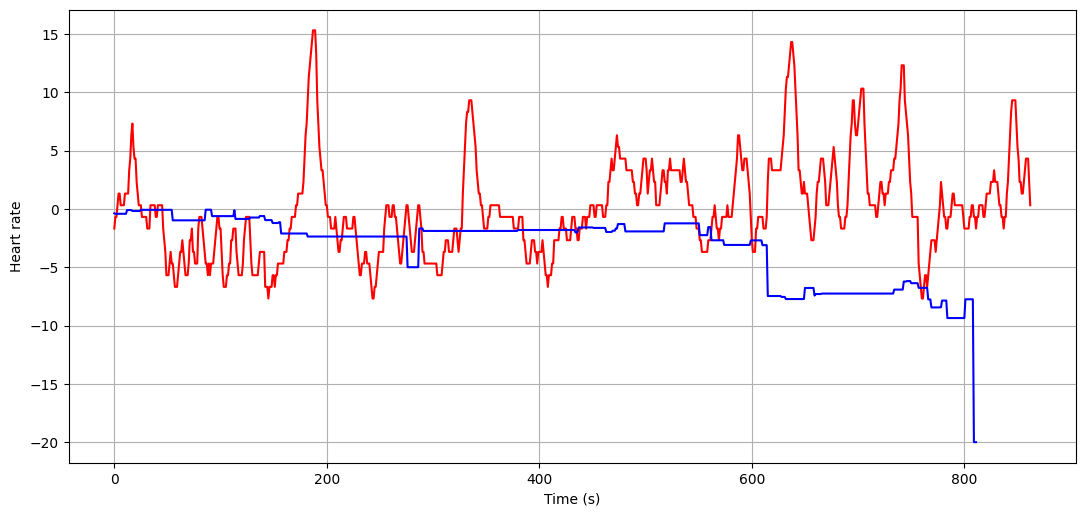

In [195]:
realwage = pd.read_csv("prova.csv")
realwage = realwage.pivot_table(values='Value',
                                index='Time',
                                columns=['Game', 'Player', 'Statistics'])

plt.rcParams["figure.figsize"] = (13,6)
hb = realwage['Game0']['b']['HR']-realwage['Game0']['b']['HR'].mean()
t = realwage.index
eb = realwage['Game0']['b']['Evaluation']
plt.grid()
plt.plot(t,hb, 'r')
plt.plot(t,eb,'b')
plt.xlabel("Time (s)")
plt.ylabel("Heart rate")
plt.show()

<AxesSubplot:>

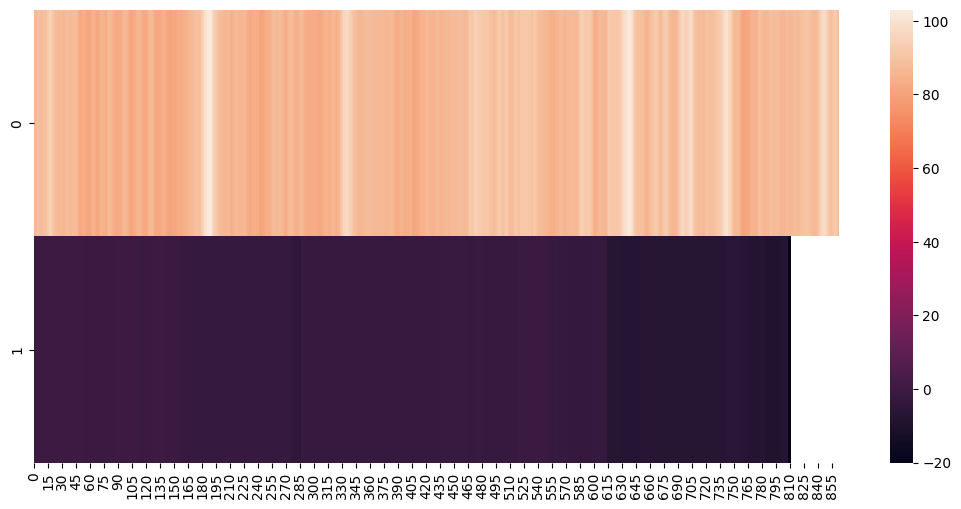

In [196]:
#heatmap or correlation matrix

hrw = realwage['Game0']['b']['HR']
evw=realwage['Game0']['b']['Evaluation']
df = np.array([hrw,evw])
sns.heatmap(df)


In [208]:
df1 = pd.DataFrame(hrw,evw)


Time,0,1,2,3,4,5,6,7,8,9,...,854,855,856,857,858,859,860,861,862,863
Time,,,,,,,,,,,,,,,,,,,,,
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
860,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
861,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [210]:
realwage.corr()


Game                         Game0                                        
Player                           b                             w          
Statistics              Evaluation        HR  TimeUsed        HR  TimeUsed
Game  Player Statistics                                                   
Game0 b      Evaluation   1.000000 -0.304363 -0.768307 -0.335963 -0.793206
             HR          -0.304363  1.000000  0.355348  0.220652  0.329763
             TimeUsed    -0.768307  0.355348  1.000000  0.277751  0.967206
      w      HR          -0.335963  0.220652  0.277751  1.000000  0.294041
             TimeUsed    -0.793206  0.329763  0.967206  0.294041  1.000000

## Multivariate Normality Test
Used to determine whether a set of multivariate observations could have come from a multivariate normal distribution.A multivariate normal distribution for m variables is characterized by m means, m variances and $ \frac{m(m-1)}{2} $ covariances or correlations and the marginal distribution of each variable is normal.

- $ H_0 $: the variables come from a Multivariate Normal Distribution
- $ H_A $: the variables don't come from a Multivariate Normal Distribution